#Dataset Information

##BankX Marketing Dataset
The data is related to direct marketing campaigns (phone calls) of a BankX. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

The dataset's attributes are described as following:

Input variables:
### Bank client data:
1 - age (numeric)
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4 - education (categorical: "unknown","secondary","primary","tertiary")
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)
7 - housing: has housing loan? (binary: "yes","no")
8 - loan: has personal loan? (binary: "yes","no")
### Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)
## Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")


Our task is to explore the dataset and create a simple model to predict whether a customer is subscribed a term deposit or not. You should create a Jupyter Notebook for your work and present it.

<div style="border:2px solid black; padding:10px;">
  Bank Term Deposit Marketing
</div>

Link for dataset:


**Our goal:** Perform a binary classification task (the outcome is 0 or 1 which is True or false). E.g: 0 = Customer will not subscribe, 1 = Customer will subscribe
Predict if the client will subscribe to a term deposit (variable y)


##Let's get started


To create a simple model to predict whether a customer will subscribe to a term deposit, we'll follow these steps:

- **Data Loading**: Load the dataset and have a first look at the data.
- **Data Preprocessing:** Clean the data, handle missing values, and convert categorical variables into a format that can be provided to a machine learning algorithm.
- **Exploratory Data Analysis (EDA)**: Understand the data by using summary statistics and data visualization.
- **Feature Engineering**: Create new features if necessary.
- **Model Building**: Select a model and train it on the dataset.
- **Evaluation**: Evaluate the model's performance.
- **Summary**: Write a summary of our findings and the model's performance.
Let's start by loading the data and performing initial data exploration.

In [ ]:
# uploading dataset to the google colab
from google.colab import files
upload = files.upload()

Saving bankX.csv to bankX (1).csv


In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, f1_score, precision_score,
                             recall_score, accuracy_score, auc, roc_curve,
                             ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.base import clone


In [ ]:
# reading dataset
path = "bankX.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# the number of rows (observations) and columns (variables).
df.shape

(45211, 18)

In [ ]:
#Checking data type of columns
df.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [ ]:
# Checking missing values of columns
df.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

We will delete unecessary column "Unamed", which isextra index column

In [ ]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])


Now,  we will check a quick visualization of the behavior of the numerical variables

In [ ]:
df.describe().round(decimals=2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [ ]:
# replace -1 with 999 in the "pdays" variable
df['pdays'] = df['pdays'].replace({-1: 999})


In [ ]:
# check the replaced value on "pdays" columns
df["pdays"].value_counts()

999    36954
182      167
92       147
91       126
183      126
       ...  
449        1
452        1
648        1
595        1
530        1
Name: pdays, Length: 559, dtype: int64

we will check the unique values in columns


In [ ]:
for i in df.columns:
        print(f"{i}:{len(df[i].unique())}")

age:77
job:12
marital:3
education:4
default:2
balance:7168
housing:2
loan:2
contact:3
day:31
month:12
duration:1573
campaign:48
pdays:559
previous:41
poutcome:4
y:2


#Outliers

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df1 = df[["pdays", "previous"]]

### Function to detect outliers

In [ ]:
def detect_outliers(df):
    outlier_indices = []

    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        #a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return df.loc[outlier_indices]


In [ ]:
detect_outliers(df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'poutcome', 'y']])
x = detect_outliers(df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'poutcome', 'y']]).index.tolist()


df1.drop(index=x, inplace=True)
# for now we will only detect outliers. we will create function to delete outliers

<ipython-input-375-69edf6f7aea5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(index=x, inplace=True)


For now we will only detect outliers. we will create function to delete outliers. Let's check our model without deleting outliers. And recheck after deleting outliers. Do this outliers effect models performance or not?

### Function to remove outliers

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
def remove_outliers(df):
    outliers = detect_outliers(df)
    df_cleaned = df.drop(outliers.index)
    return df_cleaned


In [ ]:
df2 = remove_outliers(df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'poutcome', 'y']])
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,unknown,no


In [ ]:
df= pd.concat([df2, df1], axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no,999,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no,999,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no,999,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no,999,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no,999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,unknown,yes,999,0
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,unknown,yes,999,0
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,unknown,yes,999,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,unknown,no,999,0


### Data Visualization

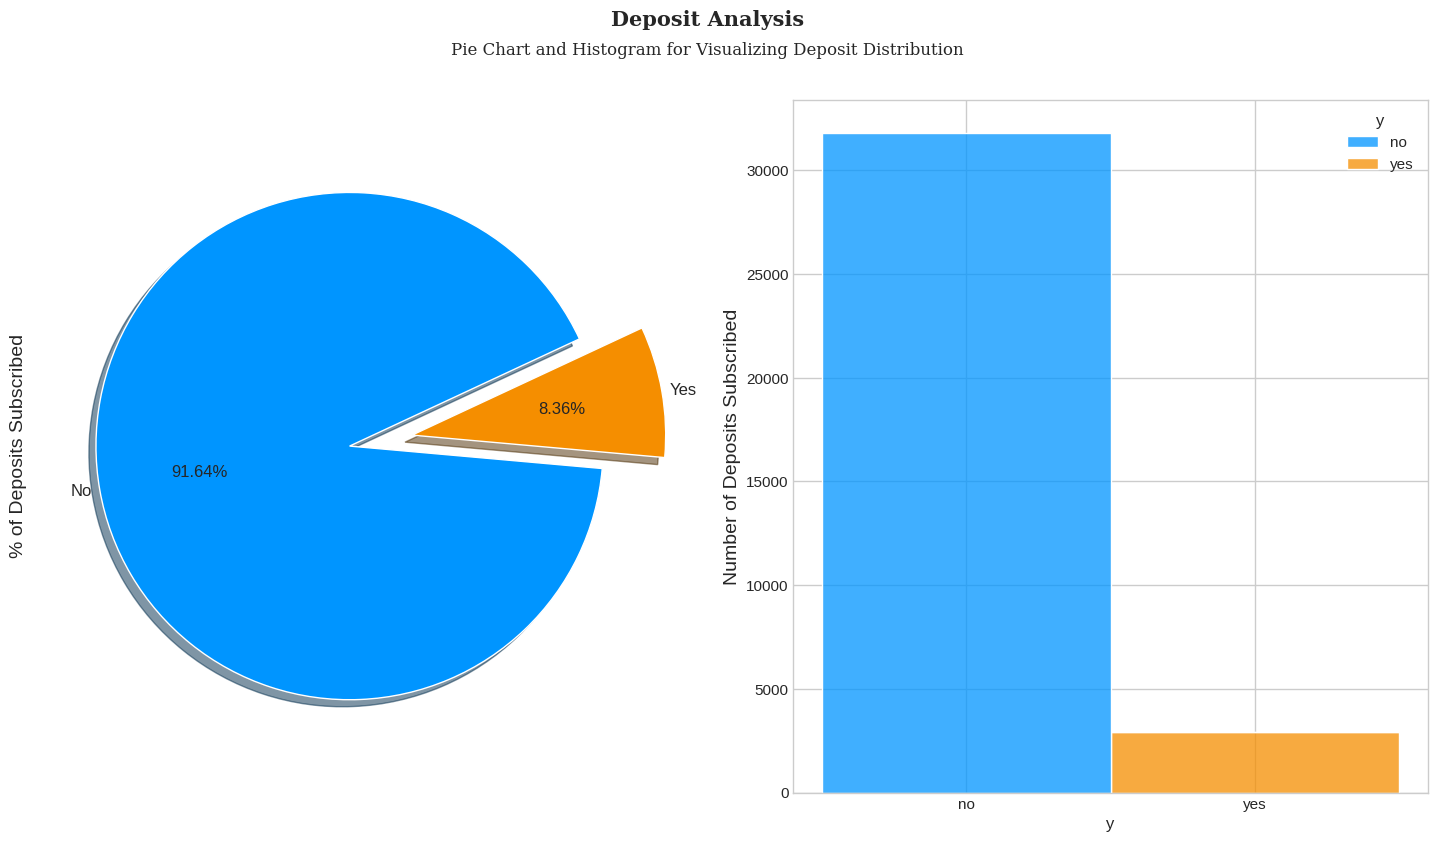

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 9))
colors = ["#0095ff", "#f58e00"]
labels = ["No", "Yes"]
hue_order = ['no', 'yes']

#main title
plt.suptitle('Deposit Analysis', family='Serif', size=15, weight='bold')
plt.figtext(0.5, 0.93, 'Pie Chart and Histogram for Visualizing Deposit Distribution',
            family='Serif', size=12, ha='center')

# pie chart
df["y"].value_counts().plot.pie(
    explode=[0, 0.25], autopct='%1.2f%%', ax=ax[0], shadow=True,
    colors=colors, labels=labels, fontsize=12, startangle=25, labeldistance=1.03
)
ax[0].set_ylabel('% of Deposits Subscribed', fontsize=14)

#histogram
sns.histplot(
    data=df, x="y", hue="y", multiple="stack",
    binwidth=3, stat="count", palette=colors, ax=ax[1], hue_order=hue_order
)
ax[1].set_ylabel('Number of Deposits Subscribed', fontsize=14)
plt.show()

<ipython-input-383-11a3dfe74920>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


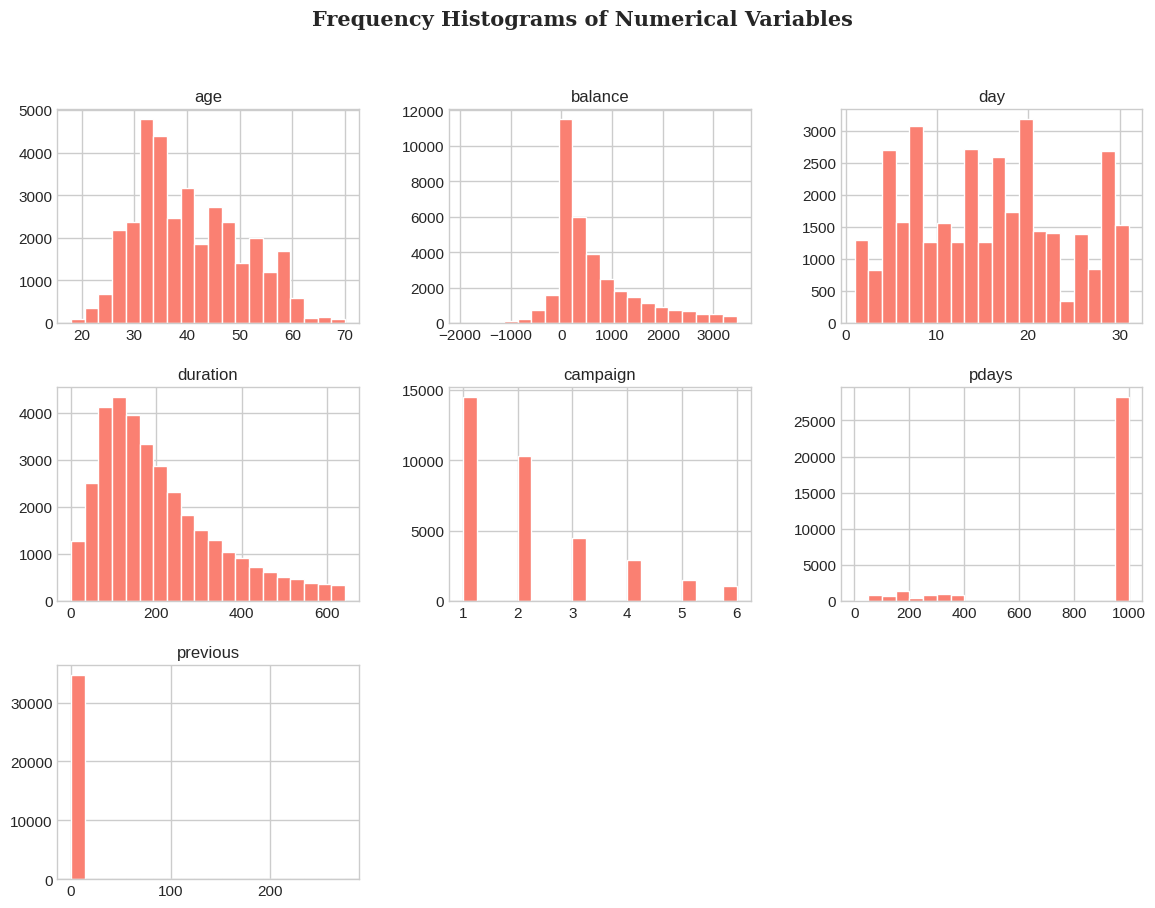

In [ ]:
plt.style.use('seaborn-whitegrid')

# histograms for all numerical variables
df.hist(bins=20, figsize=(14, 10), color="#fa8072")
plt.suptitle('Frequency Histograms of Numerical Variables', family='Serif', size=15, weight='bold')
plt.show()

In [ ]:
# categorical variable list
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

We will remove the column name 'y' from the list, as this variable has already been represented on its own in a previous plot


In [ ]:
categorical_cols.remove("y")
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

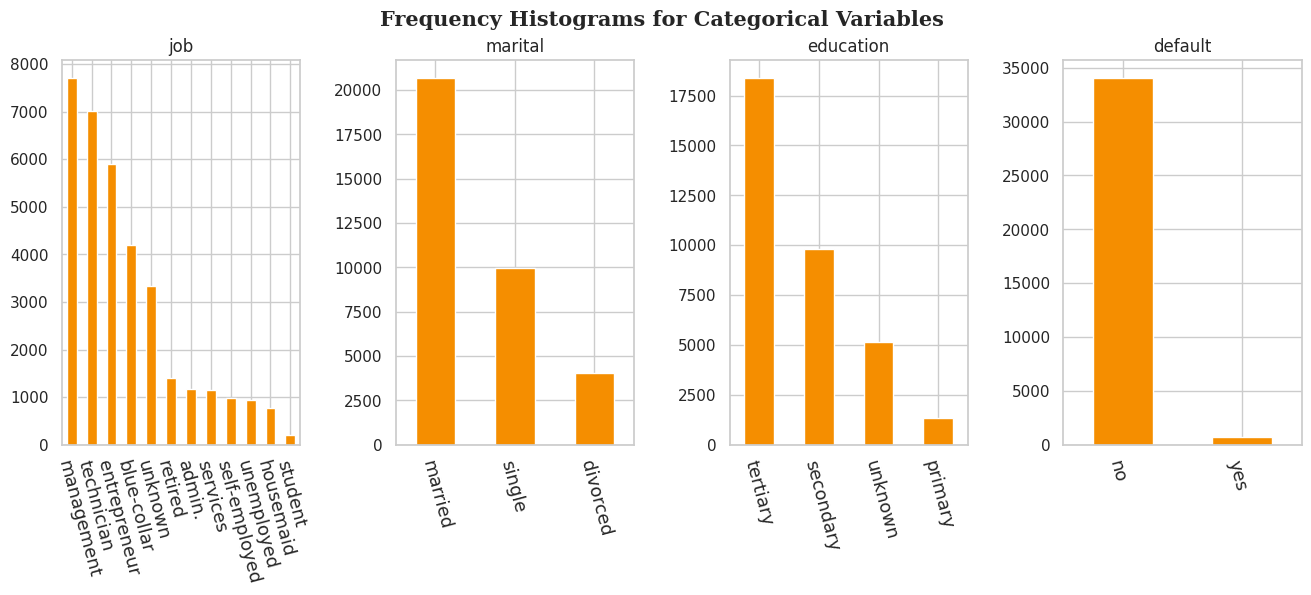

In [ ]:
sns.set_theme(style='whitegrid')

# Select first 4 categorical features for clearer visualization
categorical_features = categorical_cols[:4]
fig, ax = plt.subplots(1, len(categorical_features), figsize=(16,5))

# bar charts for each categorical feature
for i, categorical_feature in enumerate(categorical_features):
    if categorical_feature in df.columns:
        df[categorical_feature].value_counts().plot(
            kind="bar", ax=ax[i], color="#f58e00"
        ).set_title(categorical_feature)
        ax[i].set_xticklabels(
            labels=df[categorical_feature].unique(),
            rotation=285, ha='left', rotation_mode='anchor', size=13
        )
    else:
        ax[i].set_title(f"{categorical_feature} not found")
        ax[i].set_xticklabels([])

plt.subplots_adjust(wspace=0.4)
plt.suptitle('Frequency Histograms for Categorical Variables', family='Serif', size=15, weight='bold')
plt.show()

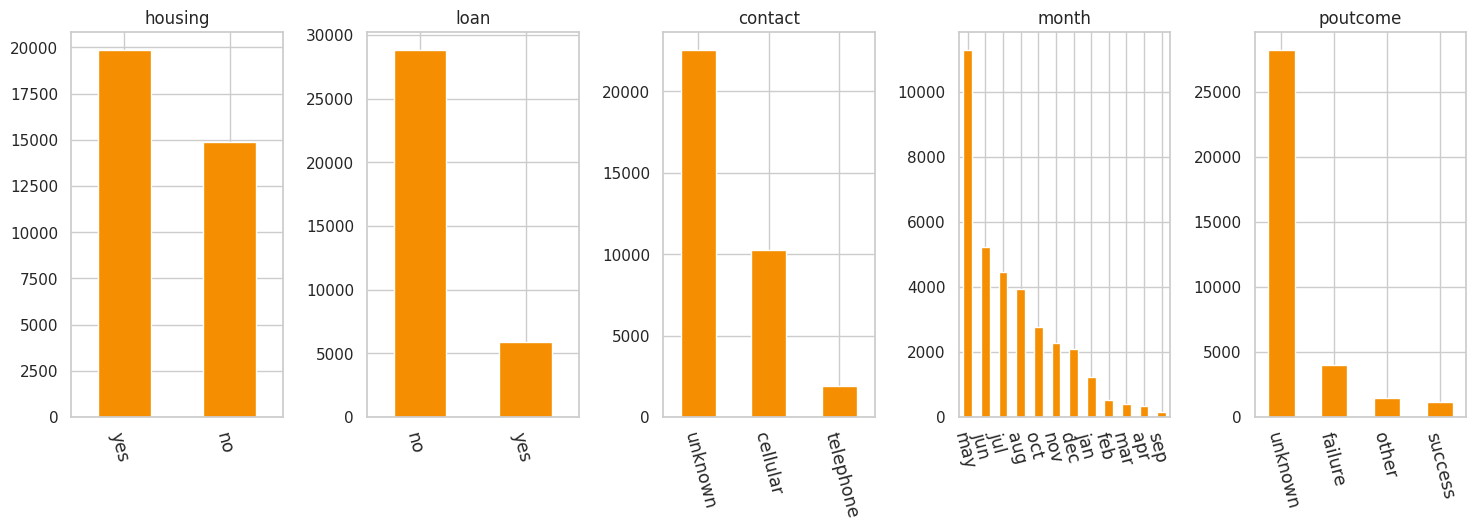

In [ ]:
# Use remaining 5 categorical column names
categorical_features = categorical_cols[4:]
fig, ax = plt.subplots(1, len(categorical_features), figsize=(18,5))
sns.set_theme(style='whitegrid')


# bar charts for each categorical feature
for i, categorical_feature in enumerate(categorical_features):
    if categorical_feature in df.columns:
        df[categorical_feature].value_counts().plot(
            kind="bar", ax=ax[i], color="#f58e00"
        ).set_title(categorical_feature)
        ax[i].set_xticklabels(
            labels=df[categorical_feature].unique(),
            rotation=285, ha='left', rotation_mode='anchor', size=12.5
        )
    else:
        ax[i].set_title(f"{categorical_feature} not found")
        ax[i].set_xticklabels([])

plt.subplots_adjust(wspace=0.4)
plt.show()

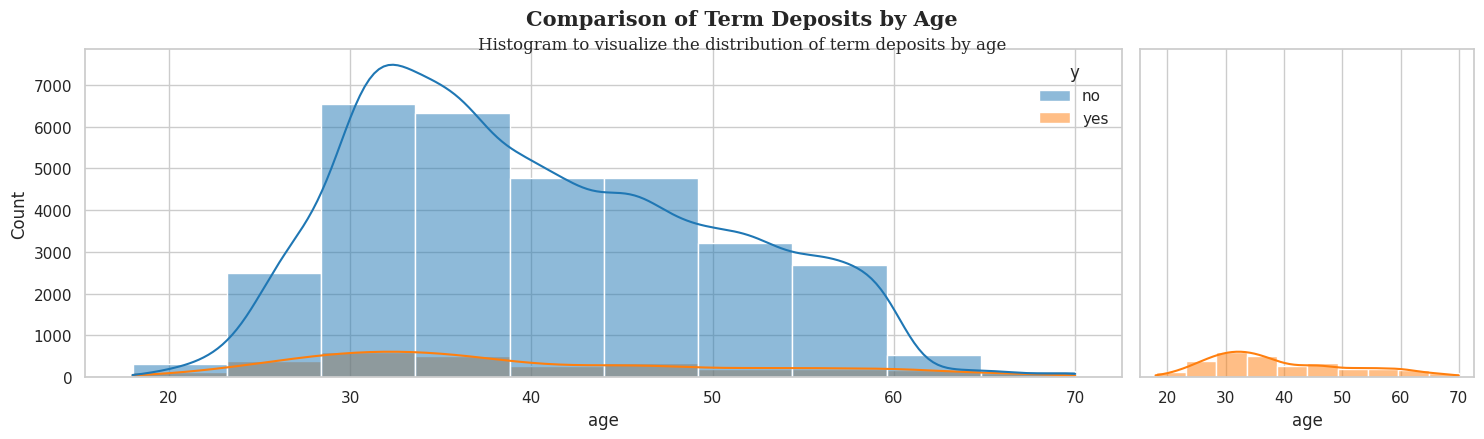

In [ ]:
#bar and line charts to observe the distribution of term deposit subscriptions by age
fig = plt.figure(figsize=(15,8), facecolor=(0.2,0.0,0.0,0.0), edgecolor='black')
plt.suptitle('Comparison of Term Deposits by Age', family='Serif', size=15, weight='bold')
plt.figtext(0.5, 0.93, 'Histogram to visualize the distribution of term deposits by age',
            family='Serif', size=12, ha='center')
gs = GridSpec(nrows=2, ncols=4, figure=fig)
ax1 = plt.subplot(gs[0, :3])


# histogram with parameters for all observations, grouped by 'y' (term deposit subscription)
sns.histplot(data=df, x='age', bins=10, ax=ax1, kde=True, hue='y', multiple='layer',
             element='bars', palette=['#1f77b4', '#ff7f0e'], hue_order=['no', 'yes'])
ax2 = plt.subplot(gs[0, 3], sharey=ax1)


#histogram for observations of people who have a term deposit ('yes')
sns.histplot(data=df[df['y'] == 'yes'], x='age', bins=10, ax=ax2, kde=True, color="#ff7f0e")
ax2.yaxis.set_visible(False)
plt.tight_layout()
plt.show()

We will create boxplots to observe the distribution of term deposit subscriptions by age

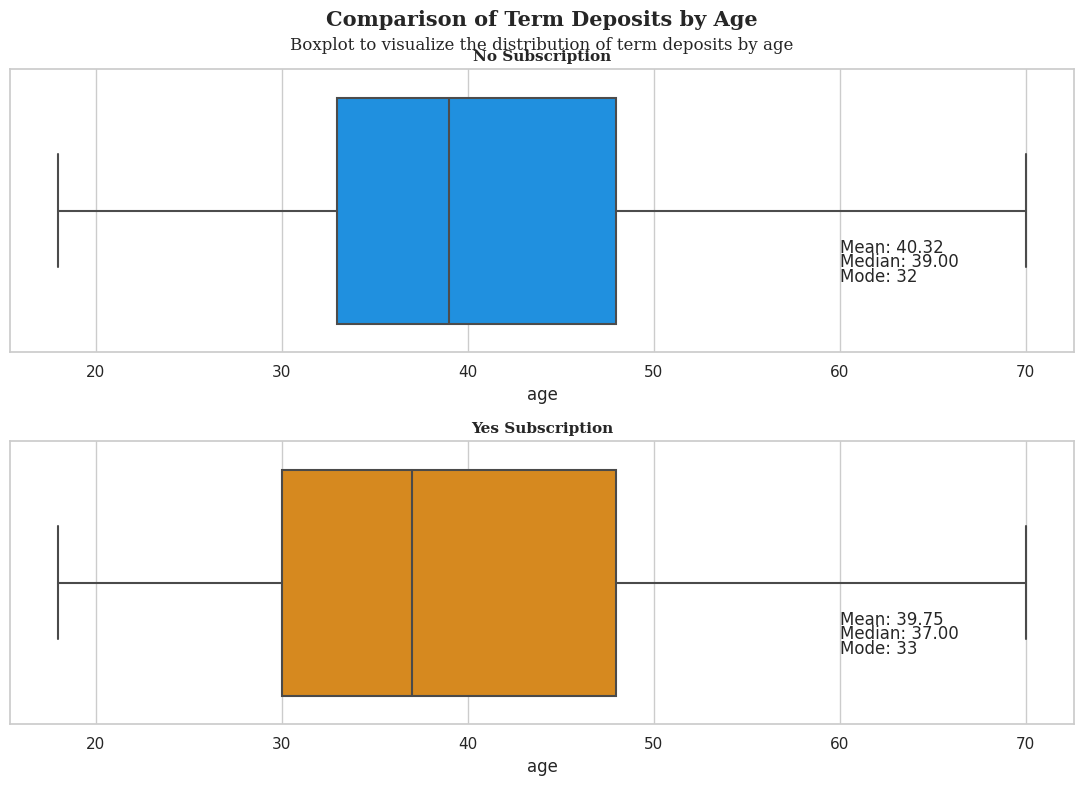

In [ ]:
fig = plt.figure(figsize=(11,8), facecolor=(0.2,0.0,0.0,0.0), edgecolor='black')
plt.suptitle('Comparison of Term Deposits by Age', family='Serif', size=15, weight='bold')
plt.figtext(0.5, 0.93, 'Boxplot to visualize the distribution of term deposits by age',
            family='Serif', size=12, ha='center')

gs = GridSpec(nrows=2, ncols=4, figure=fig)


#'no' subscription category
ax1 = plt.subplot(gs[0, :4])
sns.boxplot(data=df[df['y'] == 'no'], x='age', ax=ax1, color="#0095ff")
ax1.text(60, 0.15, f"Mean: {df[df['y'] == 'no']['age'].mean():.2f}")
ax1.text(60, 0.20, f"Median: {df[df['y'] == 'no']['age'].median():.2f}")
mode_no = df[df['y'] == 'no']['age'].mode()
ax1.text(60, 0.25, f"Mode: {mode_no[0] if not mode_no.empty else 'NA'}")
ax1.set_title("No Subscription", family='Serif', size=11, weight='bold')


#"Yes" subscription category
ax2 = plt.subplot(gs[1, :4])
sns.boxplot(data=df[df['y'] == 'yes'], x='age', ax=ax2, color="#f58e00")
ax2.text(60, 0.15, f"Mean: {df[df['y'] == 'yes']['age'].mean():.2f}")
ax2.text(60, 0.20, f"Median: {df[df['y'] == 'yes']['age'].median():.2f}")
mode_yes = df[df['y'] == 'yes']['age'].mode()
ax2.text(60, 0.25, f"Mode: {mode_yes[0] if not mode_yes.empty else 'NA'}")
ax2.set_title("Yes Subscription", family='Serif', size=11, weight='bold')


plt.tight_layout()
plt.show()

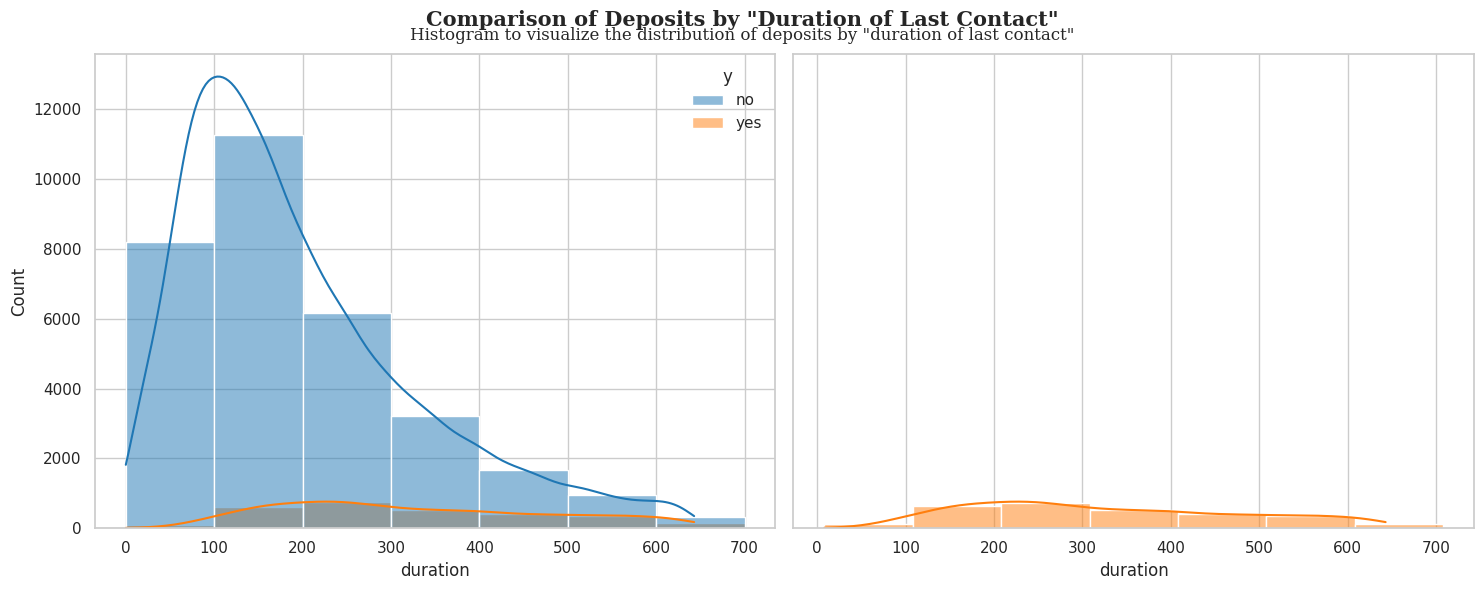

In [ ]:
def plot_distribution(df, x, title, hue='y', bins=10, binwidth=100, palette=None, hue_order=None):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    # full histogram.
    sns.histplot(data=df, x=x, bins=bins, ax=ax[0], kde=True, hue=hue,
                 multiple='layer', element='bars', binwidth=binwidth, palette=palette, hue_order=hue_order)

    # histogram for 'yes' only.
    sns.histplot(data=df[df[hue] == 'yes'], x=x, bins=bins, ax=ax[1],
                 kde=True, binwidth=binwidth, color=palette[1] if palette else None)

    fig.suptitle(f'Comparison of Deposits by {title}', family='Serif', size=15, weight='bold')
    plt.figtext(0.5, 0.93, f"Histogram to visualize the distribution of deposits by {title.lower()}",
                family='Serif', size=12, ha='center')
    ax[1].yaxis.set_visible(False)
    plt.tight_layout()
    plt.show()


# we are using the above function to plot distibution of specific column
plot_distribution(df=df, x='duration', title='"Duration of Last Contact"',
                  bins=10, binwidth=100, palette=['#1f77b4', '#ff7f0e'], hue_order=['no', 'yes'])


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome',
       'y', 'pdays', 'previous'],
      dtype='object')

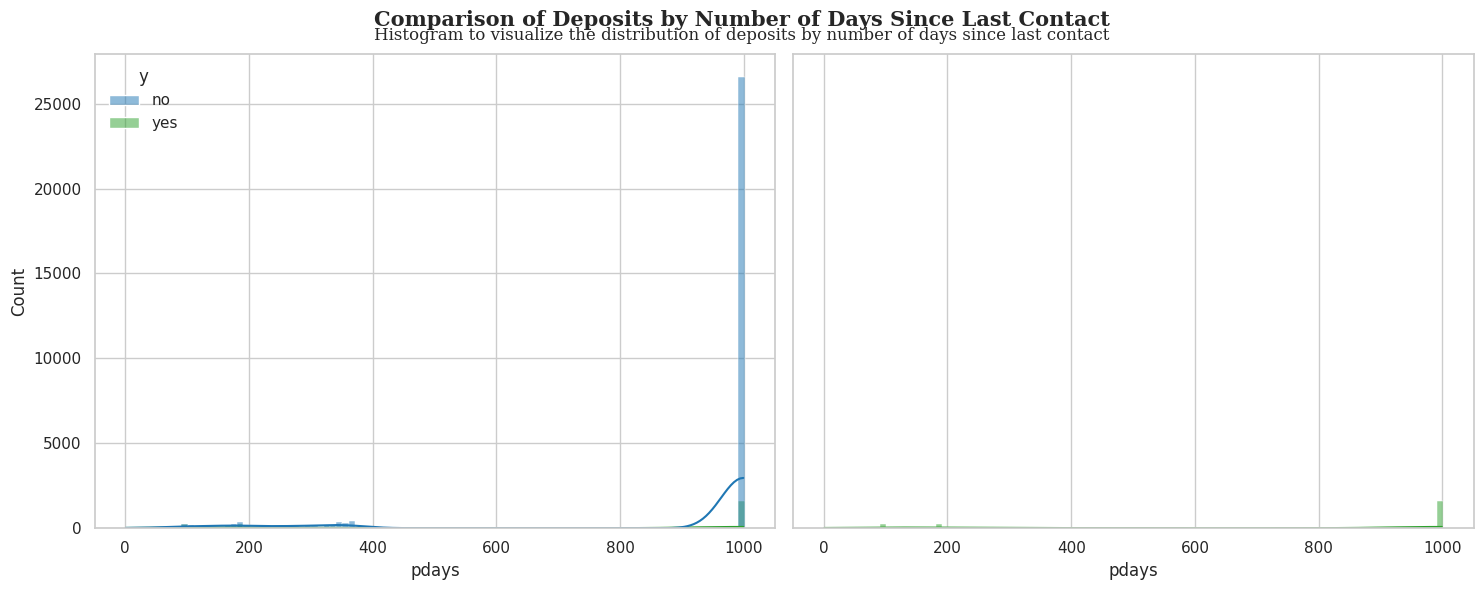

In [ ]:
plot_distribution(df=df, x='pdays', title='Number of Days Since Last Contact',
                  bins=10, binwidth=10, palette=['#1f77b4', '#2ca02c'], hue_order=['no', 'yes'])


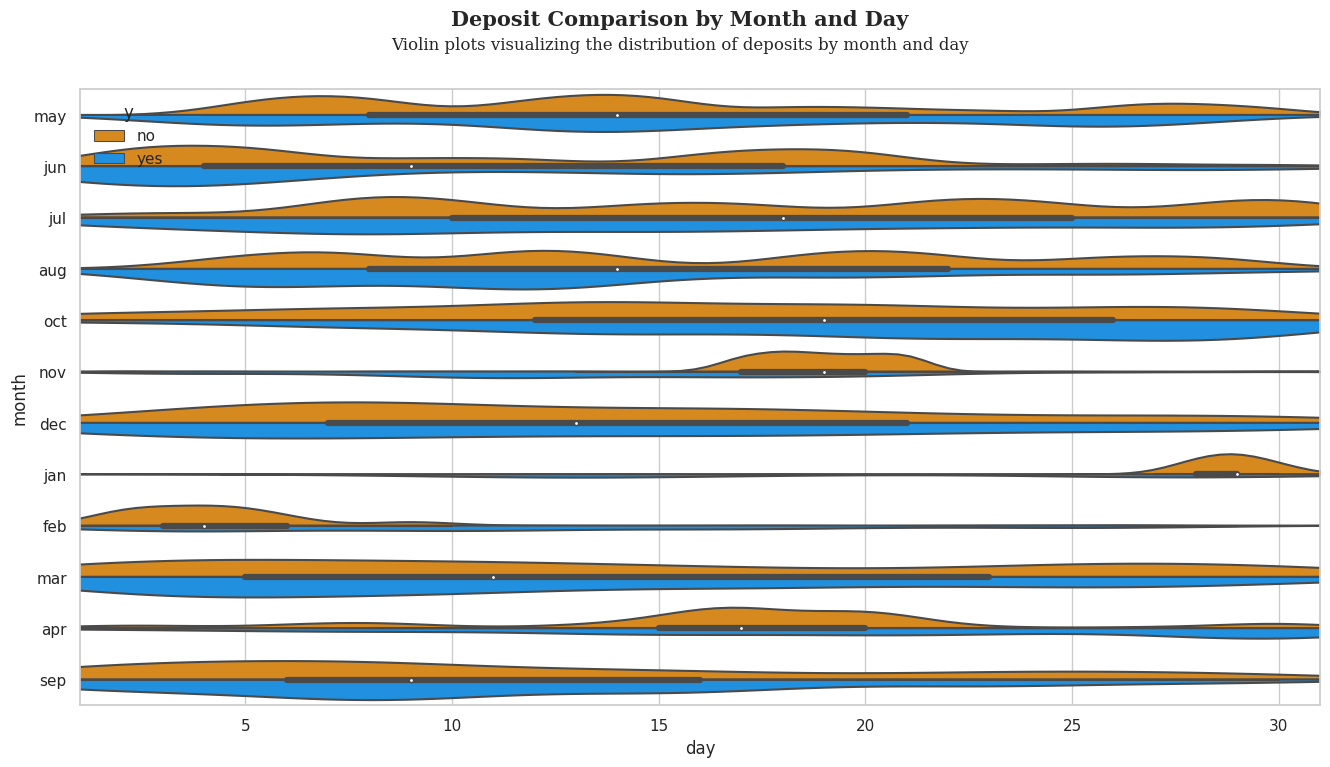

In [ ]:
fig = plt.figure(figsize=(16, 8))
plt.suptitle('Deposit Comparison by Month and Day', family='Serif', size=15, weight='bold')
plt.figtext(0.5, 0.93, "Violin plots visualizing the distribution of deposits by month and day",
            family='Serif', size=12, ha='center')
sns.violinplot(data=df, x="day", y="month", hue="y", palette=["#f58e00", "#0095ff"], split=True)

plt.xlim(1, 31)
plt.show()


In [ ]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5), gridspec_kw={"height_ratios": (.2, .8)})

    # Boxplot
    sns.boxplot(x=col, data=df, ax=ax[0], color="#1D8EF5")
    ax[0].set_title(title, fontsize=18)
    ax[0].set(yticks=[])  # Hides the y-axis ticks

    # Histogram
    sns.histplot(x=col, data=df, ax=ax[1], color="#33AAFF", edgecolor="#1D1EA2")
    ax[1].set_xlabel(col, fontsize=16)

    # Lines for mean, median, and mode
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]

    ax[1].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2.2, label=f'mean={np.round(mean_val, 1)}{symb}')
    ax[1].axvline(median_val, color='red', linestyle='--', linewidth=2.2, label=f'median={np.round(median_val, 1)}{symb}')
    ax[1].axvline(mode_val, color='purple', linestyle='--', linewidth=2.2, label=f'mode={np.round(mode_val, 1)}{symb}')

    ax[1].legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)

    plt.tight_layout()
    plt.show()


###How duration of deposit is affected by age?

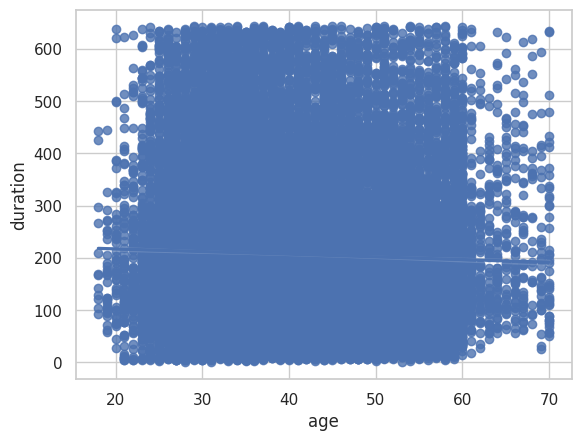

In [ ]:
sns.regplot(x='age',y='duration', data=df)
plt.show()

### Jobs and deposit

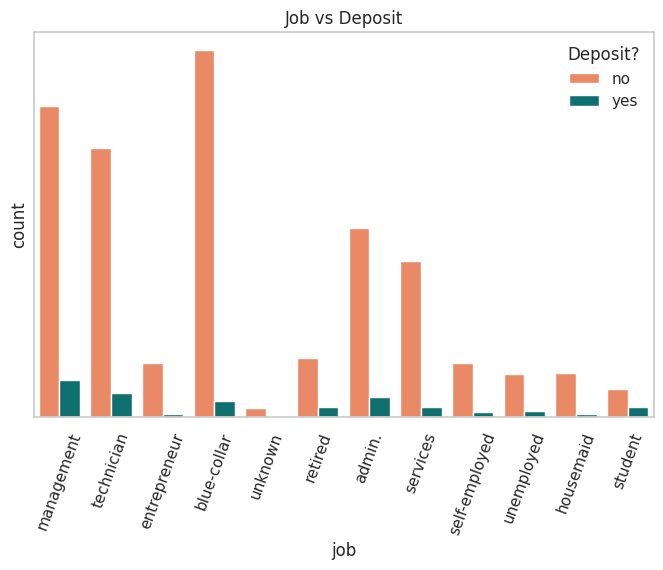

In [ ]:
teal_coral_palette = {'yes': '#008080', 'no': '#FF7F50'}

plt.figure(figsize=(8, 5))
plt.title('Job vs Deposit')
g = sns.countplot(x='job', hue='y', data=df, palette=teal_coral_palette)
plt.xticks(rotation=70)
plt.yticks([])
plt.legend(title='Deposit?', ncol=1, fancybox=True, shadow=True)
plt.show()


###Marital Status & Deposit

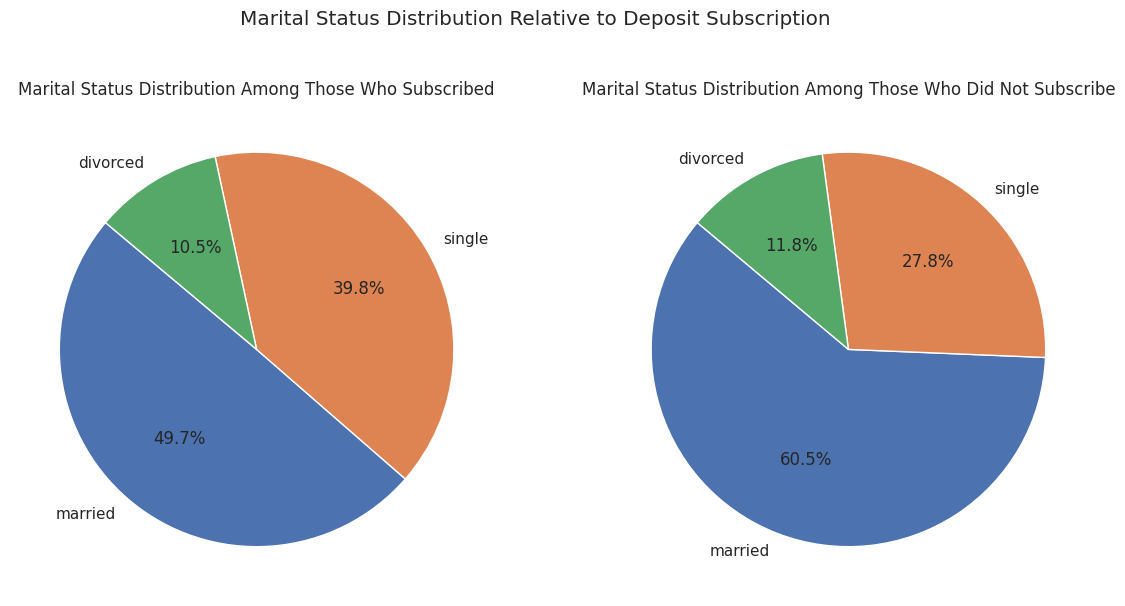

In [ ]:
# Filtering the dataset for those who have subscribed ('yes') and not subscribed ('no') to the deposit
subscribed = df[df['y'] == 'yes']['marital'].value_counts(normalize=True)
not_subscribed = df[df['y'] == 'no']['marital'].value_counts(normalize=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Pie chart for those who have subscribed to the deposit
axes[0].pie(subscribed, labels=subscribed.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Marital Status Distribution Among Those Who Subscribed')

# Pie chart for those who have not subscribed to the deposit
axes[1].pie(not_subscribed, labels=not_subscribed.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Marital Status Distribution Among Those Who Did Not Subscribe')

plt.suptitle('Marital Status Distribution Relative to Deposit Subscription')
plt.show()

### Education & Deposit

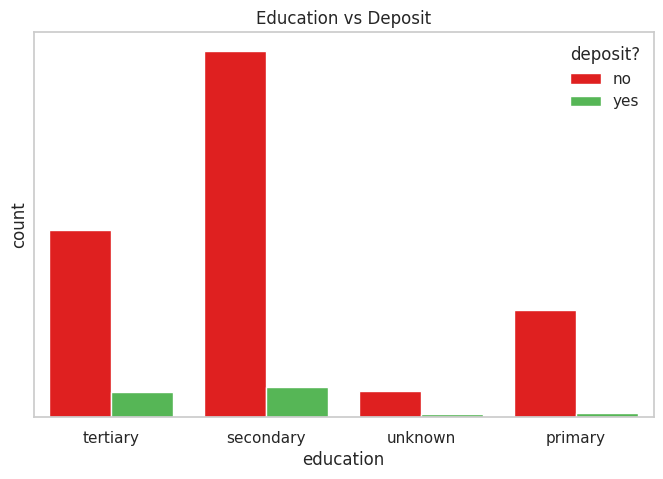

In [ ]:
palette = {'yes':'#46C646', 'no':'#FF0000'}

plt.figure(figsize=(8, 5));
plt.title('Education vs Deposit')
g = sns.countplot(x= 'education', hue = 'y', data=df, palette=palette);
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
plt.show()

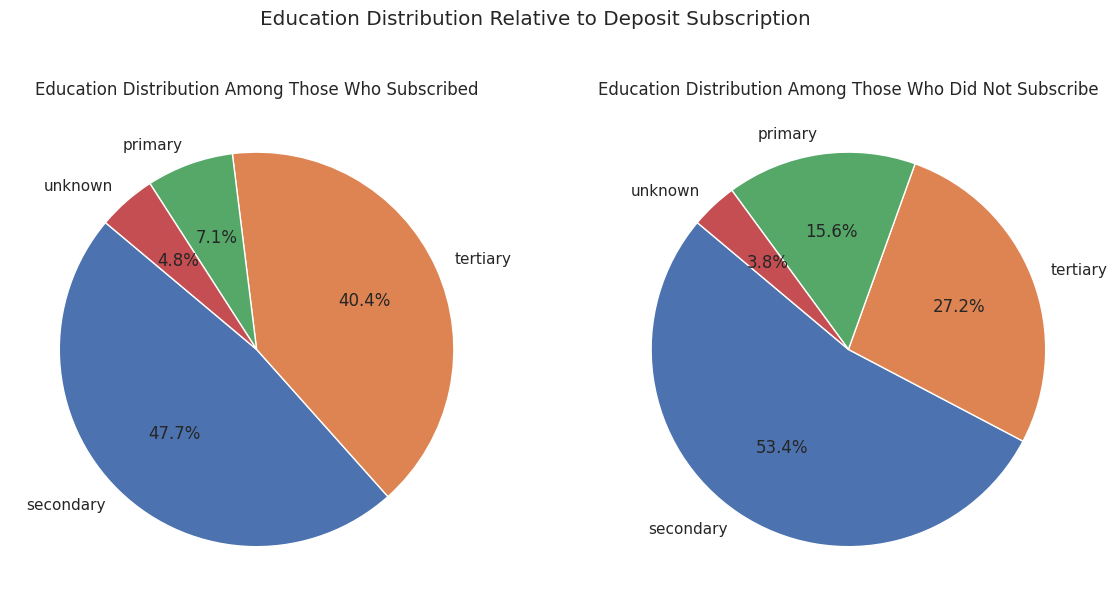

In [ ]:
education_subscribed_df = df[df['y'] == 'yes']['education'].value_counts(normalize=True)
education_not_subscribed_df = df[df['y'] == 'no']['education'].value_counts(normalize=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
axes[0].pie(education_subscribed_df, labels=education_subscribed_df.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Education Distribution Among Those Who Subscribed')
axes[1].pie(education_not_subscribed_df, labels=education_not_subscribed_df.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Education Distribution Among Those Who Did Not Subscribe')

plt.suptitle('Education Distribution Relative to Deposit Subscription')
plt.show()

###Housing & Deposit

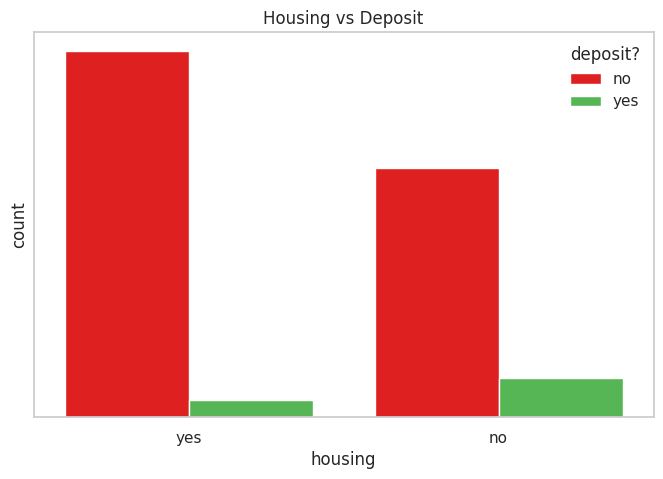

In [ ]:
plt.figure(figsize=(8, 5));
plt.title('Housing vs Deposit')
g = sns.countplot(x= 'housing', hue = 'y', data=df, palette=palette);
plt.legend(title='deposit?', ncol=1, fancybox=True, shadow=True)
plt.yticks([])
plt.show()

###Correlation Analysis

In [ ]:
df.corr()

<ipython-input-401-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.081816,-0.007502,-0.036330,0.040073,0.015095,-0.008670
balance,0.081816,1.000000,0.006602,0.022620,-0.025030,-0.076486,0.035235
day,-0.007502,0.006602,1.000000,-0.032646,0.103424,0.068122,-0.043968
duration,-0.036330,0.022620,-0.032646,1.000000,-0.073557,-0.026453,0.015525
campaign,0.040073,-0.025030,0.103424,-0.073557,1.000000,0.092407,-0.004770
pdays,0.015095,-0.076486,0.068122,-0.026453,0.092407,1.000000,-0.506057
previous,-0.008670,0.035235,-0.043968,0.015525,-0.004770,-0.506057,1.000000


<ipython-input-402-f0b896a4c862>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-402-f0b896a4c862>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


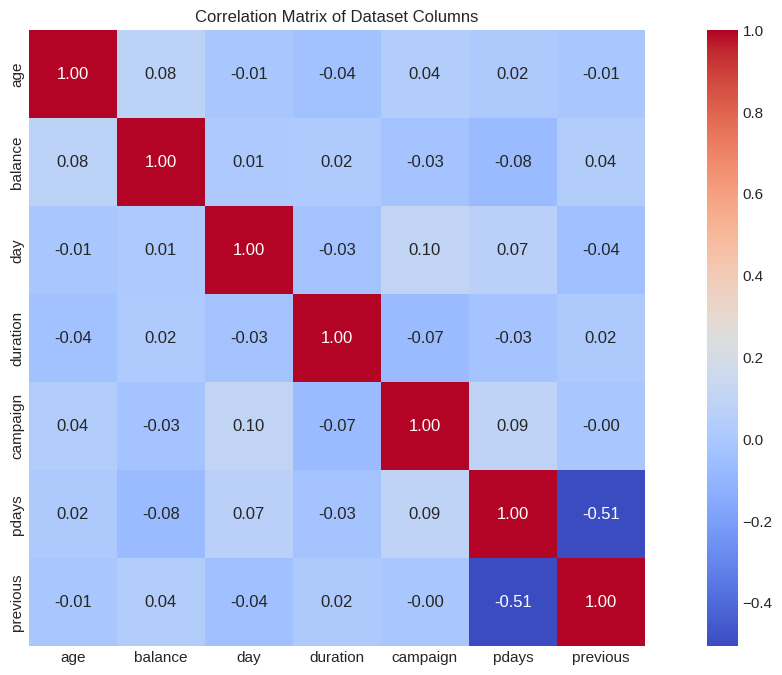

In [ ]:
plt.style.use('seaborn-whitegrid')

correlation_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True)
plt.title('Correlation Matrix of Dataset Columns')
plt.show()

In [ ]:
def label_and_rare_analyser(dataframe, target, cat_cols):
    # Function to label encode binary columns
    def label_encoder(df, binary_col):
        labelencoder = LabelEncoder()
        df[binary_col] = labelencoder.fit_transform(df[binary_col])
        return df

    binary_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'object' and dataframe[col].nunique() == 2]
    for col in binary_cols:
        label_encoder(dataframe, col)

    # Rare analysis
    for col in cat_cols:
        col_summary = dataframe[col].value_counts().to_frame('COUNT')
        col_summary['RATIO'] = dataframe[col].value_counts() / len(dataframe)
        col_summary['TARGET_MEAN'] = dataframe.groupby(col)[target].mean()

        print(f"Analysis for Column: {col}")
        print("--------------------------------")
        print(f"Total Categories: {len(dataframe[col].value_counts())}")
        print(col_summary, end="\n\n")


label_and_rare_analyser(df, "y", categorical_cols)


Analysis for Column: job
--------------------------------
Total Categories: 12
               COUNT     RATIO  TARGET_MEAN
blue-collar     7705  0.221925     0.041661
management      7003  0.201705     0.107383
technician      5890  0.169648     0.081494
admin.          4187  0.120597     0.093623
services        3332  0.095971     0.057623
retired         1398  0.040266     0.145207
self-employed   1180  0.033987     0.085593
entrepreneur    1147  0.033037     0.047951
unemployed       984  0.028342     0.127033
housemaid        933  0.026873     0.063237
student          762  0.021948     0.263780
unknown          198  0.005703     0.101010

Analysis for Column: marital
--------------------------------
Total Categories: 3
          COUNT     RATIO  TARGET_MEAN
married   20679  0.595610     0.069733
single     9991  0.287768     0.115504
divorced   4049  0.116622     0.075327

Analysis for Column: education
--------------------------------
Total Categories: 4
           COUNT     RATI

In [ ]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

### Building ML model

In [ ]:
# Drop the Job Occupations and Education that are "Unknown", it is not needed for our model
df = df.drop(df.loc[df["job"] == "unknown"].index)
df = df.drop(df.loc[df["education"] == "unknown"].index)

In [ ]:
# Data normalization function
def preprocess_data(df):
    scaler = MinMaxScaler()
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    label_encoder = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
    return df


df_preprocessed = preprocess_data(df)

In [ ]:
# our dataset is normalized
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y,pdays,previous
0,0.769231,4,1,2,0.0,0.756012,1.0,0.0,2,0.133333,8,0.405910,0.0,3,0.0,1.000000,0.00
1,0.500000,9,2,1,0.0,0.364965,1.0,0.0,2,0.133333,8,0.234837,0.0,3,0.0,1.000000,0.00
2,0.288462,2,1,1,0.0,0.359970,1.0,1.0,2,0.133333,8,0.118196,0.0,3,0.0,1.000000,0.00
3,0.557692,1,1,3,0.0,0.638180,1.0,0.0,2,0.133333,8,0.143079,0.0,3,0.0,1.000000,0.00
4,0.288462,11,2,3,0.0,0.359785,0.0,0.0,2,0.133333,8,0.307932,0.0,3,0.0,1.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,0.307692,0,2,1,0.0,0.462634,0.0,0.0,0,0.533333,9,0.348367,0.0,3,1.0,1.000000,0.00
45203,0.096154,8,2,2,0.0,0.380503,0.0,0.0,0,0.533333,9,0.413686,0.0,3,1.0,1.000000,0.00
45205,0.134615,9,2,1,0.0,0.453015,0.0,1.0,0,0.533333,9,0.600311,0.2,3,1.0,1.000000,0.00
45209,0.750000,1,1,1,0.0,0.483167,0.0,0.0,1,0.533333,9,0.790047,0.6,3,0.0,1.000000,0.00


###Splitting dataset



In [ ]:
# Splitting the dataset into features and target
X = df.drop('y', axis=1)
y = df['y']

X.shape, y.shape

((34719, 16), (34719,))

We will split the data into training and test sets to monitor models accuracy on new dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Model Training and Evaluation

Now, we will train different models, compare the accuracy of the different models and get best one. After getting best ml algorithm. We will print classification report, etc

Model Accuracies:
Logistic Regression: Accuracy = 0.92
Random Forest: Accuracy = 0.93
Gradient Boosting: Accuracy = 0.93
Support Vector Machine: Accuracy = 0.92
K-Nearest Neighbors: Accuracy = 0.92
Decision Tree: Accuracy = 0.90
Gaussian Naive Bayes: Accuracy = 0.85

Best Model: Random Forest


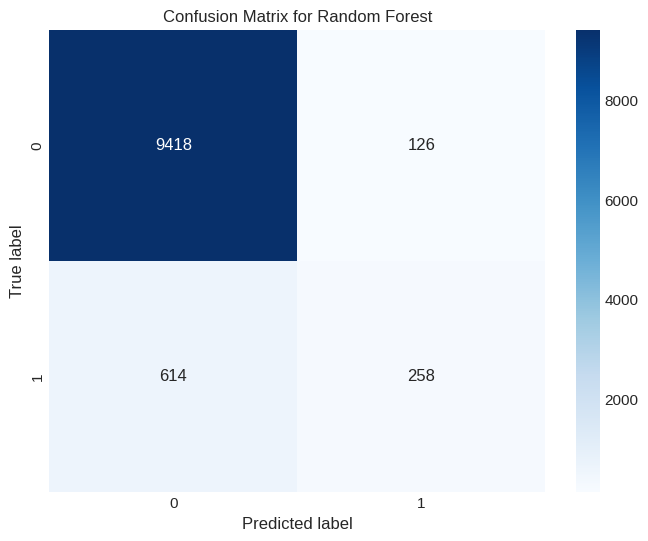

Specificity: 0.9867979882648784

Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      9544
         1.0       0.67      0.30      0.41       872

    accuracy                           0.93     10416
   macro avg       0.81      0.64      0.69     10416
weighted avg       0.92      0.93      0.92     10416



In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}


results = []
for name, model in models.items():
    model_clone = clone(model)
    model_clone.fit(X_train, y_train)
    y_pred = model_clone.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": accuracy, "Model_Object": model_clone})

#best performing model
best_model_info = max(results, key=lambda x: x['Accuracy'])
best_model = best_model_info['Model']
best_model_object = best_model_info['Model_Object']


print("Model Accuracies:")
for result in results:
    print(f"{result['Model']}: Accuracy = {result['Accuracy']:.2f}")

# Confusion matrix for the best model
print(f"\nBest Model: {best_model}")
y_pred_best = best_model_object.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print("Specificity:", specificity)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))




###ROC curve for the best model

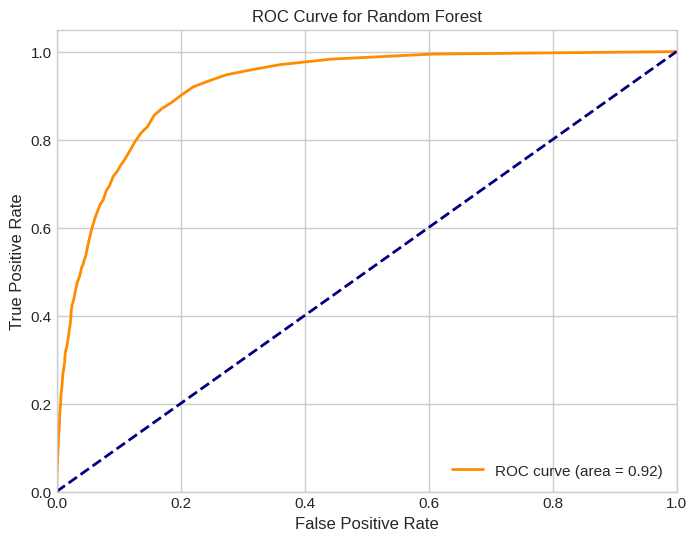

In [ ]:
# ROC curve for the best model
if hasattr(best_model_object, "predict_proba"):
    fpr, tpr, thresholds = roc_curve(y_test, best_model_object.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plotting ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {best_model}')
    plt.legend(loc="lower right")
    plt.show()
else:
    print(f"The model {best_model} does not support probability predictions.")

###Saving the model (We do not need actually. We can delete below cell)

To save a trained machine learning model, you can use the `pickle` module or the `joblib` module from Scikit-Learn. `joblib` is often preferred for saving large NumPy arrays, which are typically involved in machine learning models, as it is more efficient for this purpose.

Here's how you can save a model using `joblib`:

### Step 1: Import joblib

First, you need to import the `joblib` module. If you don't have it installed, you can install it via pip:

```bash
pip install joblib
```

Then, in your Python script or notebook:

```python
from joblib import dump
```

### Step 2: Save the Model

Use the `dump` function to save your model. For example, to save the best model from your previous code:

```python
# Save the best model
model_filename = 'best_model.joblib'
dump(best_model_object, model_filename)

print(f"Model saved as {model_filename}")
```

This code will save the best-performing model to a file named `'best_model.joblib'` in your current working directory.

### Step 3: Load the Model (When Needed)

Later, when you need to use the model again, you can load it using `joblib.load`. Here's how:

```python
from joblib import load

# Load the model
loaded_model = load(model_filename)

# Now you can use loaded_model to make predictions or further analysis
```

This approach is straightforward and effective for persisting models so that they can be reused without the need to retrain them each time.